In [25]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import networkx as nx
import matplotlib.pylab as plt
import numpy as np
import pyLDAvis
import pyLDAvis.gensim
from gensim import corpora, models
from gensim.parsing.preprocessing import remove_stopwords
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [17]:
df = pd.read_json('Nature_Total.json', orient='table') # Nature에서 'COVID-19'과 'SARS-CoV-2'를 검색한 결과
df

,Articles,DOI,Journal,Authors,Published,Target
0,CpG-adjuvanted stable prefusion SARS-CoV-2 spi...,doi:10.1038/s41598-021-88283-8,Nature Publishing Group,"[Chia-En Lien, Yi-Jiun Lin, Charles Chen, Wei-...",2021-04-22,[The COVID-19 pandemic presents an unprecedent...
1,COVID-19 tissue atlases reveal SARS-CoV-2 path...,doi:10.1038/s41586-021-03570-8,Nature Publishing Group,"[Toni M. Delorey, Carly G. K. Ziegler, Graham ...",2021-04-29,"[COVID-19, caused by SARS-CoV-2, can result in..."
2,The furin cleavage site in the SARS-CoV-2 spik...,doi:10.1038/s41564-021-00908-w,Nature Publishing Group,"[Thomas P. Peacock, Daniel H. Goldhill, Jie Zh...",2021-04-27,[SARS-CoV-2 entry requires sequential cleavage...
3,SARS-CoV-2 infection rewires host cell metabol...,doi:10.1038/s41467-021-22166-4,Nature Publishing Group,"[Peter J. Mullen, Gustavo Garcia, Arunima Purk...",2021-03-25,[Viruses hijack host cell metabolism to acquir...
4,Multilevel proteomics reveals host perturbatio...,doi:10.1038/s41586-021-03493-4,Nature Publishing Group,"[Alexey Stukalov, Virginie Girault, Vincent Gr...",2021-04-12,[The emergence and global spread of SARS-CoV-2...
...,...,...,...,...,...,...
4007,WHO informal consultation on the guidelines fo...,doi:10.1038/s41541-020-0197-2,Nature Publishing Group,"[Rebecca Sheets, Hye-Na Kang, Heidi Meyer, Iva...",2020-06-18,[Promoting regulatory convergence is recognize...
4008,Bridging the gap between graphs and networks,doi:10.1038/s42005-020-0359-6,Nature Publishing Group,"[Gerardo Iñiguez, Federico Battiston, Márton K...",2020-05-15,[Behind the history of mankind’s scientific pr...
4009,How much longer does NHS dentistry have left?,doi:10.1038/s41404-020-0395-7,Nature Publishing Group,"[David Westgarth, David Westgarth]",2020-05-04,[I keep hearing and reading this phrase from c...
4010,Rachel Jackson: 'There is no more poignant tim...,doi:10.1038/s41415-020-1484-z,Nature Publishing Group,"[Kate Quinlan, Kate Quinlan]",2020-04-10,"[Reprints and Permissions, Quinlan, K. Rachel ..."


In [18]:
df['Target'].iloc[0]

'The COVID-19 pandemic presents an unprecedented challenge to global public health. Rapid development and deployment of safe and effective vaccines are imperative to control the pandemic. In the current study, we applied our adjuvanted stable prefusion SARS-CoV-2 spike (S-2P)-based vaccine, MVC-COV1901, to hamster models to demonstrate immunogenicity and protection from virus challenge. Golden Syrian hamsters immunized intramuscularly with two injections of 1\xa0µg or 5\xa0µg of S-2P adjuvanted with CpG 1018 and aluminum hydroxide (alum) were challenged intranasally with SARS-CoV-2. Prior to virus challenge, the vaccine induced high levels of neutralizing antibodies with 10,000-fold higher IgG level and an average of 50-fold higher pseudovirus neutralizing titers in either dose groups than vehicle or adjuvant control groups. Six days after infection, vaccinated hamsters did not display any weight loss associated with infection and had significantly reduced lung pathology and most impor

In [19]:
list_of_list_of_tokens = []
for data in df['Target']:
    list_of_list_of_tokens.append(remove_stopwords(' '.join(data).replace('\n', '')
                                                   .replace('Nature', '').replace('None.', '')
                                                   .replace('=', '').replace('&', '').replace('About', '')
                                                   .replace('<', '').replace('±', '').replace(',', '')).split(' '))

In [20]:
len(list_of_list_of_tokens)

4012

In [21]:
len(list_of_list_of_tokens[0])

1845

# Latent Dirichlet Allocation, LDA

In [22]:
dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

num_topics = 20
lda_model = models.LdaModel(corpus, num_topics=num_topics, 
                            id2word=dictionary_LDA, 
                            passes=4, alpha=[0.01]*num_topics, 
                            eta=[0.01]*len(dictionary_LDA.keys()))

In [23]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+str([i[7:] for i in topic.split('" + ')]))
    print()

0: ['health', 'behavior', 'digital', 'And', 'models', '(e.g.', 'assessment', 'behavioral', 'risk', 'science"']

1: ['model', 'Figure', 'models', 'values', 'rate', '+', 'infected', '-', 'set', 'parameters"']

2: ['gene', 'genes', 'genetic', 'variants', 'A.', 'Oman', 'M.', 'identified', 'expression', 'sequencing"']

3: ['binding', 'mM', 'protein', '°C', 'cells', 'min', '10', 'structure', 'acid', 'concentration"']

4: ['cases', 'countries', 'population', 'public', 'people', 'social', 'transmission', 'lockdown', 'model', 'measures"']

5: ['mice', 'samples', 'lung', 'RNA', 'levels', 'SARS-CoV-2', 'cells', 'performed', 'viral', 'treatment"']

6: ['cells', 'SARS-CoV-2', 'cell', 'viral', 'expression', 'human', 'ACE2', 'genes', 'virus', 'RNA"']

7: ['risk', 'severe', 'SARS-CoV-2', 'patient', 'symptoms', 'positive', 'treatment', 'age', 'mortality', 'cases"']

8: ['example', 'health', 'systems', 'social', 'participants', 'human', 'et', 'medical', 'technologies', 'patient"']

9: ['Study', 'youth',

In [26]:
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA, mds='mmds') 
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

# Word2Vec
Skip-gram

In [27]:
w2v_model = Word2Vec(list_of_list_of_tokens,
                     min_count=5,
                     window=4,
                     size=100,
                     workers=4,
                     sg=1) # Skip-gram

In [30]:
w2v_model.wv.most_similar(positive=["SARS-Cov-2"])

[('SARS-CoV-2', 0.8457210659980774),
 ('SARS-COV-2', 0.7966666221618652),
 ('SARS-CoV2', 0.7932962775230408),
 ('COVID19', 0.7396789789199829),
 ('CoV-2', 0.7361211180686951),
 ('SARS‐CoV‐2', 0.7278127670288086),
 ('SARS-CoV-2.', 0.7162827849388123),
 ('SARS-CoV-2;', 0.7159730195999146),
 ('COVID-19', 0.7134174704551697),
 ('undetermined', 0.7108661532402039)]

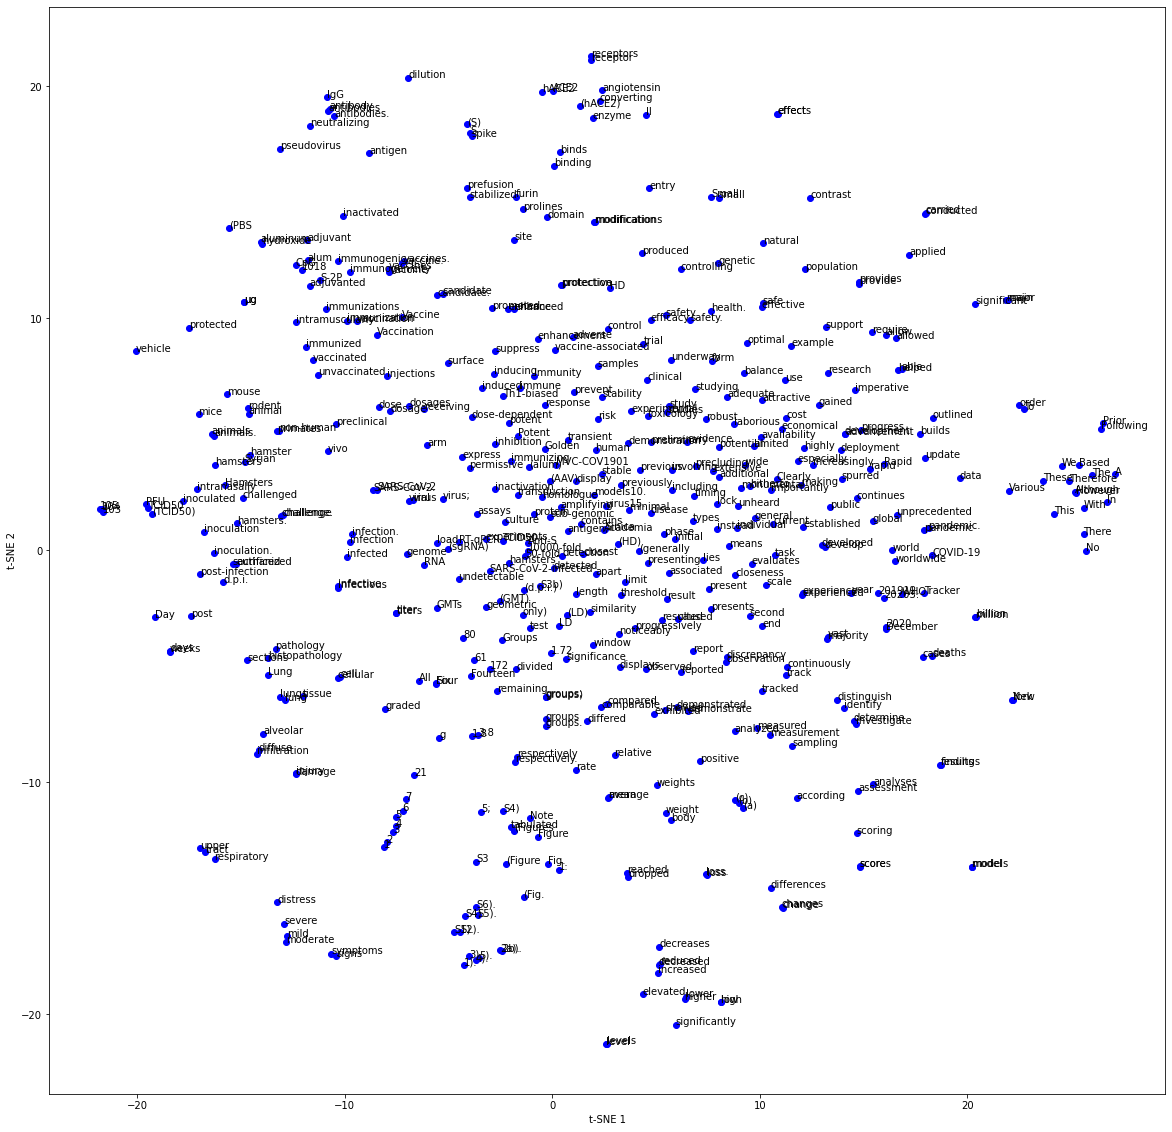

In [32]:
vocab = list(w2v_model.wv.vocab)
X = w2v_model[vocab]
sz = 500 # 500개의 단어에 대해서만 시각화 
X_show = X[:sz,:]
vocab_show = vocab[:sz]

tsne = TSNE(n_components=2) 
X = tsne.fit_transform(X_show) 
df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y']) 
fig = plt.figure() 
fig.set_size_inches(20, 20) 
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(df['x'], df['y'], c='blue') 
for word, pos in df.iterrows(): 
    ax.annotate(word, pos, fontsize=10) 
plt.xlabel("t-SNE 1") 
plt.ylabel("t-SNE 2") 
plt.show()